In [ ]:
#!pip install category_encoders

In [ ]:
# === Core Python Libraries ===
import importlib
from pathlib import Path
import warnings

# === Data Manipulation and Visualization ===
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === Statistical Analysis ===
from scipy.stats import zscore
import statsmodels.formula.api as sm

# === Scikit-learn: Model Selection & Evaluation ===
from sklearn.model_selection import (
    GridSearchCV,
    KFold,
    StratifiedKFold,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.metrics import (
    accuracy_score,
    auc,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)

# === Scikit-learn: Preprocessing & Utilities ===
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import preprocessing
from sklearn.dummy import DummyClassifier

# === Scikit-learn: Models ===
from sklearn.linear_model import (
    BayesianRidge,
    Lasso,
    LassoCV,
    LinearRegression,
    LogisticRegression,
    Ridge,
    RidgeClassifier,
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# === Imbalanced Learning ===
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# === Category Encoding ===
from category_encoders import OneHotEncoder

# === Miscellaneous Settings ===
warnings.filterwarnings('ignore')

# loan

Can we predict which new customers will likely say yes to a personal loan?

We will be using the Supervised Learning methods to predict which model is best for this problem:
*   Logistic Regression
*   K-Nearest Neighbors (KNN)
*   Naive Bayes Algorithm



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
loan = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bank_Personal_Loan_Modelling.csv')

In [ ]:
loan.shape

(5000, 14)

In [ ]:
loan.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
loan_transpose = loan.describe().T.round(2)
loan_transpose[['min', '25%', '50%', '75%', 'max']]

,min,25%,50%,75%,max
ID,1.0,1250.75,2500.5,3750.25,5000.0
Age,23.0,35.00,45.0,55.00,67.0
Experience,-3.0,10.00,20.0,30.00,43.0
Income,8.0,39.00,64.0,98.00,224.0
ZIP Code,9307.0,91911.00,93437.0,94608.00,96651.0
Family,1.0,1.00,2.0,3.00,4.0
CCAvg,0.0,0.70,1.5,2.50,10.0
Education,1.0,1.00,2.0,3.00,3.0
Mortgage,0.0,0.00,0.0,101.00,635.0
Personal Loan,0.0,0.00,0.0,0.00,1.0


# interpretaion
#### one of the important thing that I can see is that experience, because it shows minimum experience was minus 3, which is impossbile, because there is no way a person has minus 3 years experience, so it is a typo something in dataset. So this is just an indication we have minus. So maybe we have only one record. Maybe we have 100. We we have 3,000. I don't know. So we need to fix this. We need to handle this now.
#### another thing is doing the statistics for the binary things is to confirm that they are binary. That's the only thing. But there is no point of me minimum and maximum. And all of these things. It's just to make sure that they are binary.
#### with respect to this feature, so you can see which one is the normally distributed, which one of the skews to the left, which one excuse to the right quickly through this, and if you are interesting you can do fair. So the age column is normally distributed. You can see, the age is normally distributed over here. Experience is also normally distributed, but also there is something. So let us go over here.
#### The other thing is also can help you is to look at the 50%. So you can see that at 50%, and above, it shows 1.0 for Online Account. so most of the customers. they have Online account.


# start plotting from here

In [ ]:
# Pair plot for all columns in the DataFrame
sns.pairplot(loan, hue='Personal Loan', kind='reg', diag_kind='kde')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

#### The thing that is very important for me to to look at. It is how things are correlated because I have to do feature selections. For example age and experience we can see they somehow has correlation.

# Data Cleaning

In [ ]:
# Total records of negative experience
# to find out how many records are negative in experience
loan[loan['Experience'] < 0]['Experience'].count()


np.int64(52)

In [ ]:
loan.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIP Code,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal Loan,0


it shows 52 records were negative which for experience it is wrong, but can we remove all these rows? if our dataset is 400 rows it is not a good idea to remove this 52 rows. also maybe all these 52 rows where those people whom said 'yes' to acceptance of a personal loan. We must consider all of these before removing the rows.

## **Experience**

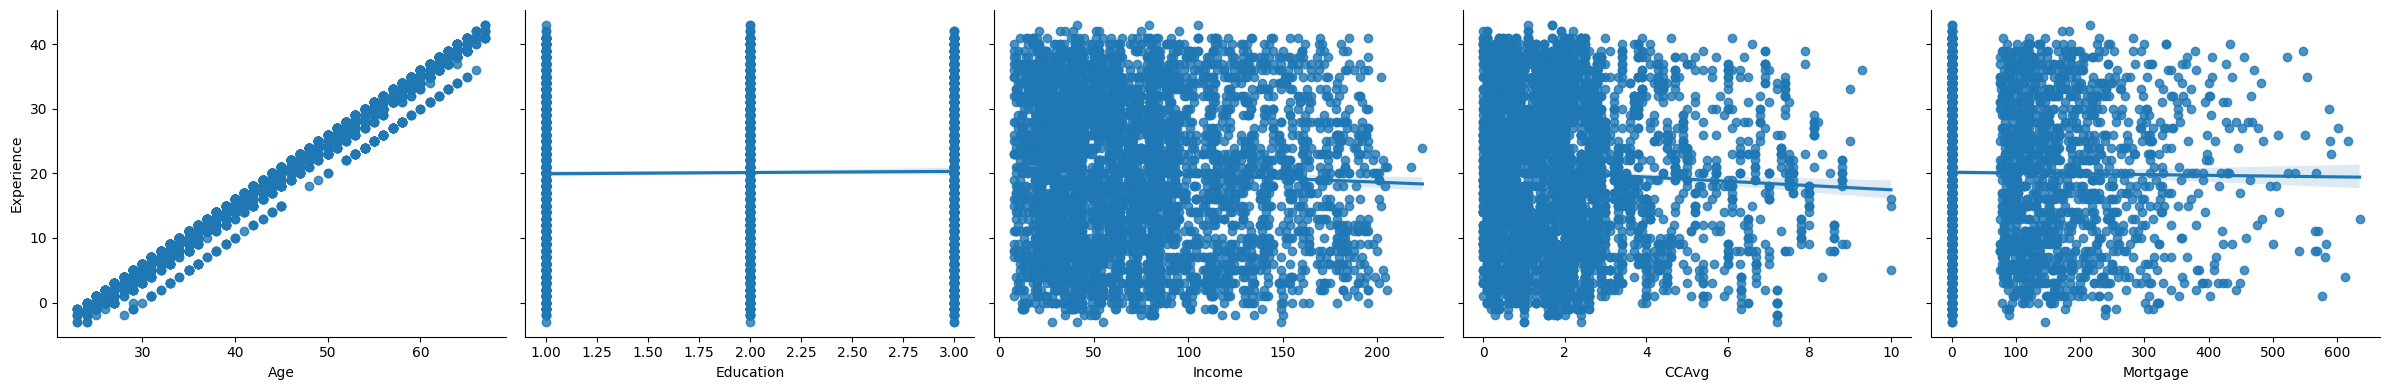

In [ ]:
quantitiveVar = ['Age', 'Education', 'Income', 'CCAvg', 'Mortgage']

expGrid = sns.PairGrid(data=loan, y_vars='Experience', x_vars=quantitiveVar, height=4, aspect=1.2)
expGrid.map(sns.regplot)

plt.tight_layout()
plt.show()

## **Age**



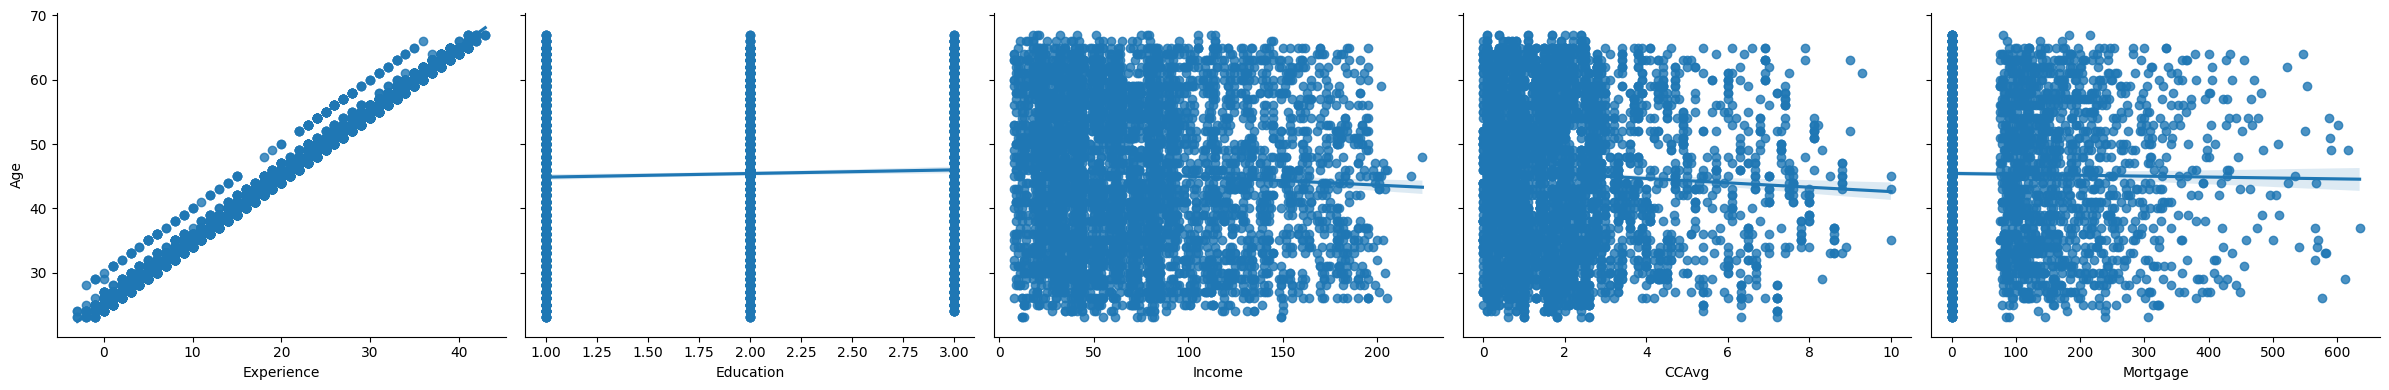

In [ ]:
quantitiveVar = ['Experience', 'Education', 'Income', 'CCAvg', 'Mortgage']

expGrid = sns.PairGrid(data=loan, y_vars='Age', x_vars=quantitiveVar, height=4, aspect=1.2)
expGrid.map(sns.regplot)

plt.tight_layout()
plt.show()

## between experience and age we see strong positive correlation.
## the other do not have corrleation really with experience

# Distributions: Histogram numerical variables: Income, Mortgage, Age, Experience

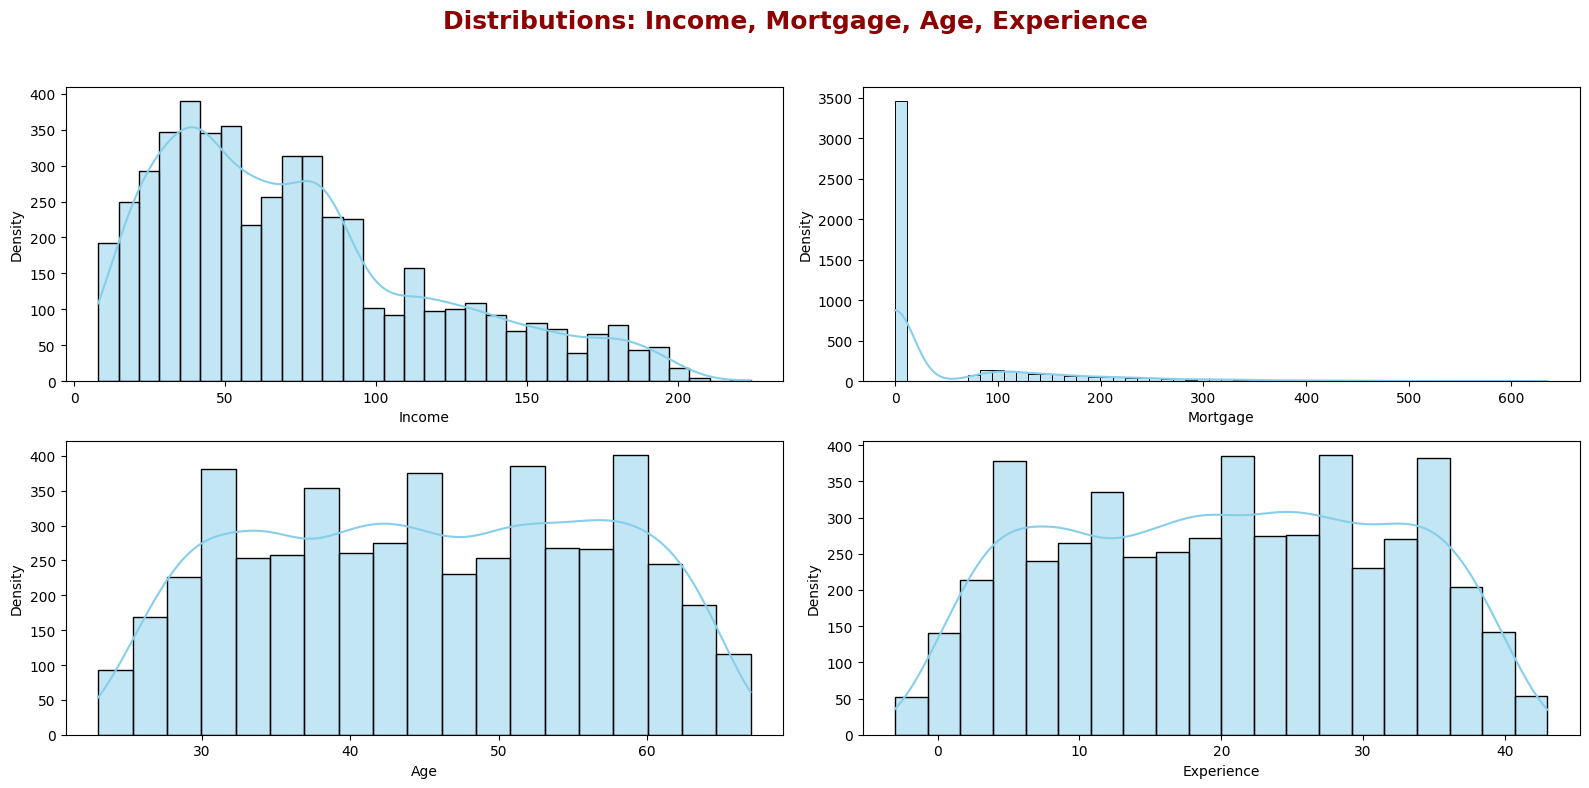

In [ ]:
plt.figure(figsize=(16, 8))
plt.suptitle("Distributions: Income, Mortgage, Age, Experience", fontsize=18, color='darkred', weight='bold')

variables = ['Income', 'Mortgage', 'Age', 'Experience']

for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.histplot(loan[var], kde=True, color='skyblue')
    plt.xlabel(var)
    plt.ylabel('Density')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



## Income: most of the customer have income below 100 thousands.
## mortgage most of the customer have no mortgage at all.
## Age, we say that is somehow is normally distributed. Guess, Gaussian, but most of the customer between you can say 30 and 60
## experience. Most of the customer they have between 10 to 40 years of experience.



# Bar chart: Categorical varibles: 'Family', 'Education', 'Securities Account', 'CD Account'



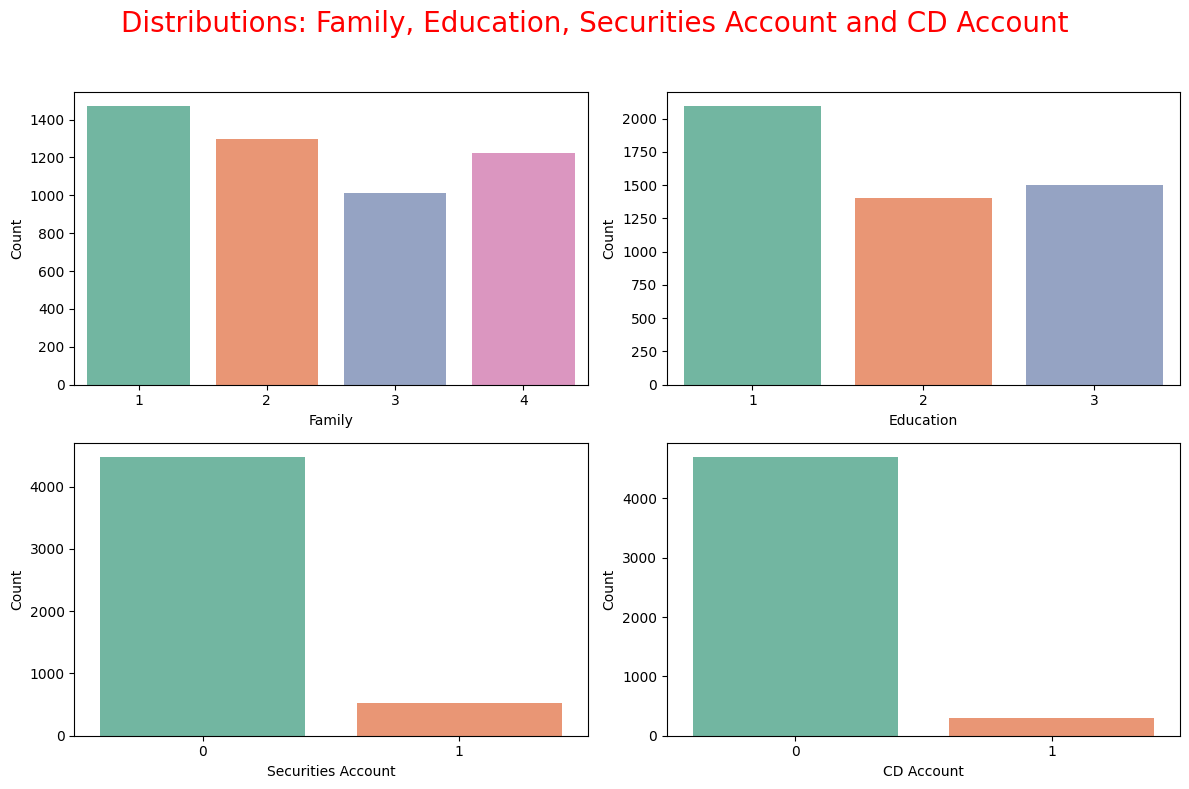

In [ ]:
# Define your categorical variables
cat_vars = ['Family', 'Education', 'Securities Account', 'CD Account']

# Create subplots
plt.figure(figsize=(12, 8))
plt.suptitle('Distributions: Family, Education, Securities Account and CD Account', fontsize=20, color='red')

# Plot each variable
for i, var in enumerate(cat_vars, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=loan[var], palette='Set2')
    plt.xlabel(var)
    plt.ylabel('Count')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the title
plt.show()


### educations. Most of the people are undergraduate educations in the system.
### Secure double account, most of them. They don't have
### certified deposit most of them. They don't have, only a few of them.

# Target Value: pie chart

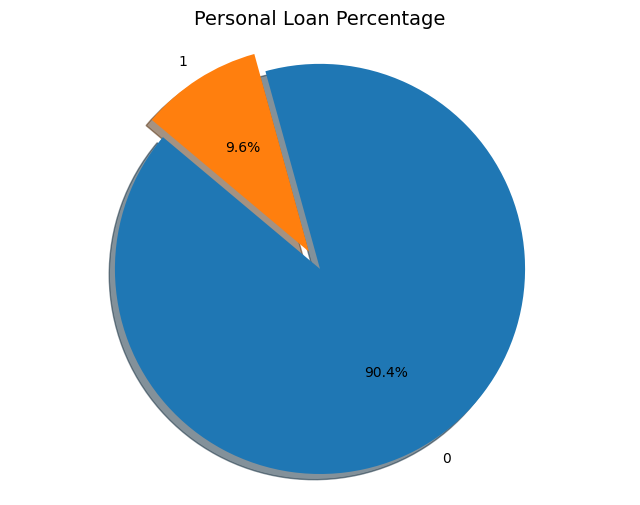

,Labels,Personal Loan
0,0,4520
1,1,480


In [ ]:
# Value counts and percentages
loan_counts = loan['Personal Loan'].value_counts()
loan_percent = loan_counts / loan_counts.sum() * 100

# Step 2: Plot pie chart
colors = ['#1f77b4', '#ff7f0e']  # blue and orange
explode = [0, 0.1]  # explode only the second slice (accepted loans)

plt.figure(figsize=(8, 6))
plt.title('Personal Loan Percentage', fontsize=14)

plt.pie(loan_percent,
        labels=loan_counts.index,
        autopct='%1.1f%%',
        explode=explode,
        colors=colors,
        shadow=True,
        startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# Step 3: Print the frequency table
display(pd.DataFrame({'Labels': loan_counts.index, 'Personal Loan': loan_counts.values}))

### Here is the target, our personal loan target. So over here, we can see, this is what is it exactly match what their claim? They say that up to 9.6% they accept and the remaining they don't accept. So it's very few. So if you want to do you know, sampling or certified starfied sampling. So you have to be careful over here. So it's very important to look here, that almost the ratio is one to 10.
#### Here is majority of the data set is no. But our model should should predict. The customer will say, yes.

# Swarmplot: Family vs Income by Personal Loan

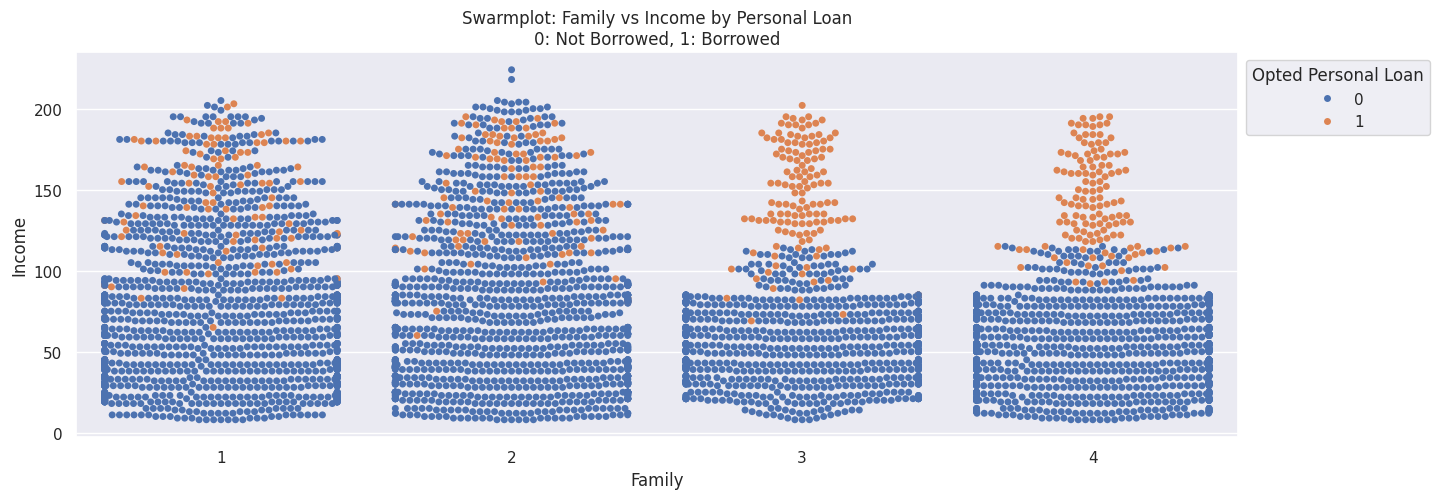

In [ ]:
sns.set(palette='deep')
plt.figure(figsize=(15,5))
sns.swarmplot(data=loan, x='Family', y='Income', hue='Personal Loan').set(title='Swarmplot: Family vs Income by Personal Loan\n0: Not Borrowed, 1: Borrowed');
plt.legend(loc="upper left" ,title="Opted Personal Loan", bbox_to_anchor=(1,1));

#### when there is a high chance that he will accept. But, as you can see, if he has a family size of 2, your high chances is not that much big? But for sure, if the customer is, has 100,000 more income with the family size, 3 or more, then there is high chance. He would do it.
#### this give us an indication, because these are actually, each one of these circle is one of the observations.
#### So, as you can see, I can somehow make a claim. If you are 50,000 or below don't contact,
#### just simply by doing one line, if the income is below 50. This is a pure no.
#### So if I make a decision, just one decision, what's the decision here? The income is less than 50, then dont contact.
#### also another observation that families size 3 and 4 with income above 120000 always say yes to a personal loan. So they would be our target contact list.



# Box plot for education and income

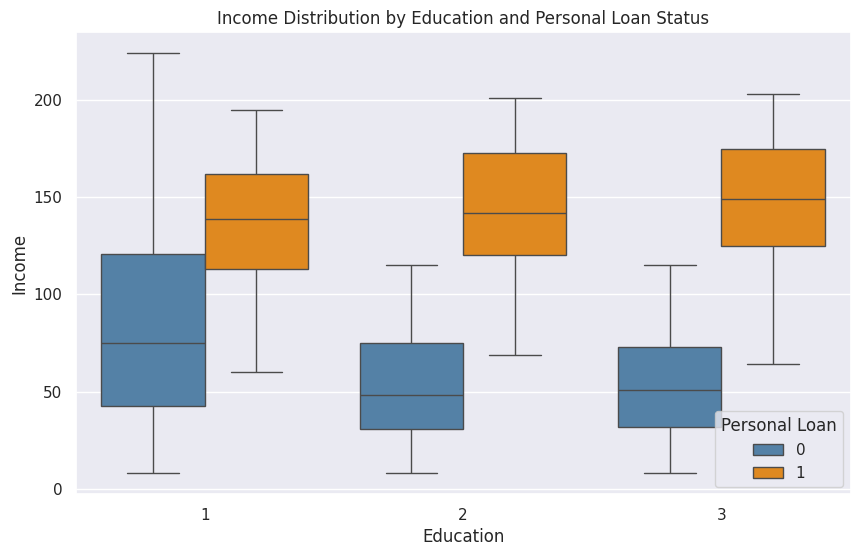

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=loan,
    x='Education',
    y='Income',
    hue='Personal Loan',         # Separate boxes by Personal Loan status
    palette={0: 'steelblue', 1: 'darkorange'}
)

plt.title('Income Distribution by Education and Personal Loan Status')
plt.xlabel('Education')
plt.ylabel('Income')
plt.legend(title='Personal Loan')
plt.show()

#### The box plot box plot is one of the very nice thing we can use. But this box plot in 2 categories. education with income.
####  I can clearly, by looking to this saying. it's clear that regardless of your education level, if you have a high income, you're likely to agree with it.

# Normalized Distribution by Personal Loan Status in ['CD Account', 'Family', 'Securities Account']

<Figure size 640x480 with 0 Axes>

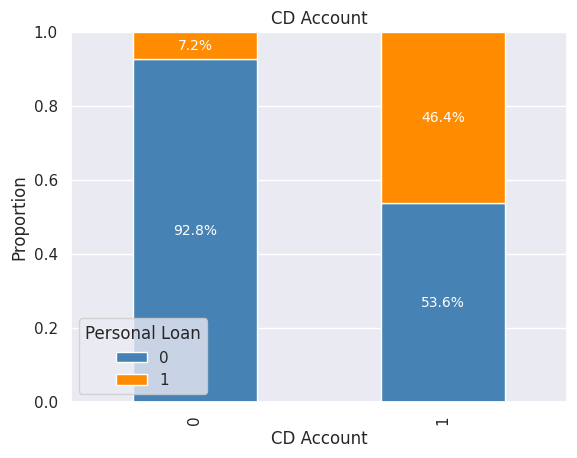

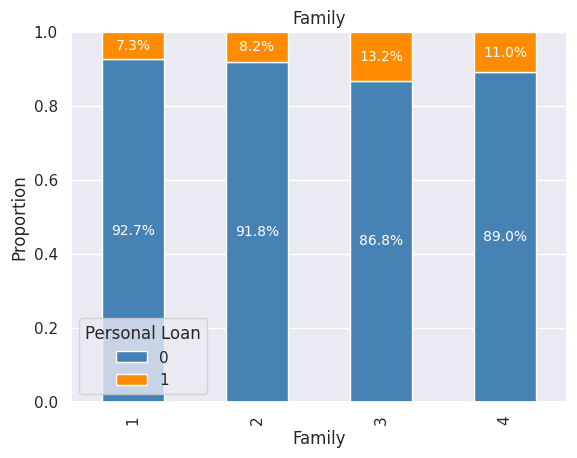

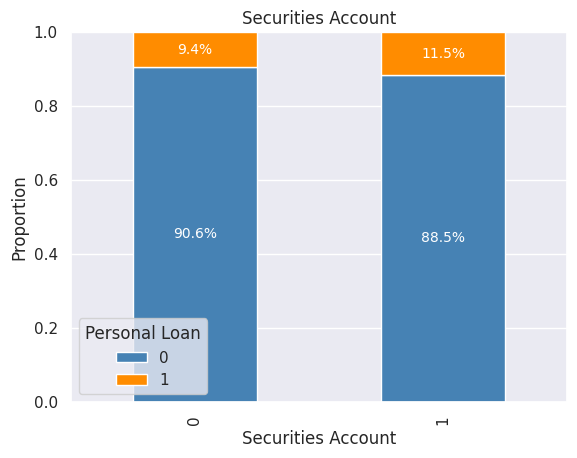

In [ ]:
# Features to visualize
features = ['CD Account', 'Family', 'Securities Account']

# Title for the entire figure
plt.suptitle('Normalized Distribution by Personal Loan Status', fontsize=18, color='black', weight='bold')

# Loop through each feature and plot
for feature in features:
    # Crosstab: proportion of Personal Loan (0/1) within each category
    cross = pd.crosstab(loan[feature], loan['Personal Loan'], normalize='index')

    # Plot stacked bar chart
    ax = cross.plot(kind='bar', stacked=True, color={0: 'steelblue', 1: 'darkorange'})

    plt.title(f'{feature}')
    plt.ylabel('Proportion')
    plt.xlabel(feature)
    plt.ylim(0, 1)
    plt.legend(title='Personal Loan')

    # Add percentage labels to each bar
    for container in ax.containers:
        labels = [f'{v.get_height() * 100:.1f}%' if v.get_height() > 0 else '' for v in container]
        ax.bar_label(container, labels=labels, label_type='center', fontsize=10, color='white')

    plt.show()



#### based on these normalized stacked bar charts, we can see that having a cd account has a strong influence on that a person accept a personal loan, as we can see near half of people whom have cd accounts say yes to personal loan, but this proportion in people with no cd accounts is 7.2%.
#### Also in family with size of 3 and 4 have slightly more possibility to accept a personal loan.
#### Having a security accout is not really influencial, but it slightly very little as 2% more people with securities account say yes to personal account.

# box plot of CreditCard and CCAvg to accept or reject a personal loan

<Axes: xlabel='CreditCard', ylabel='CCAvg'>

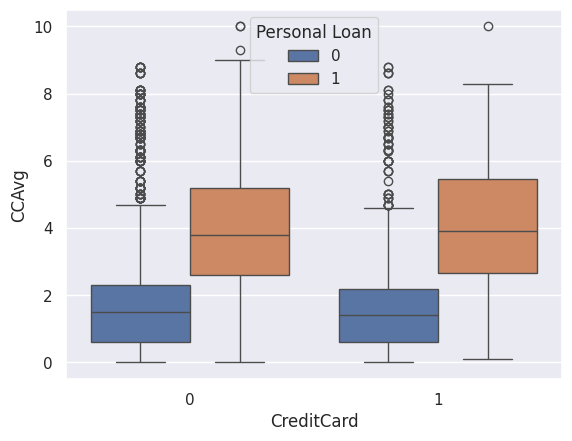

In [ ]:
# CCAvg vs CreditCard (boxplot)
sns.boxplot(data=loan, x='CreditCard', y='CCAvg', hue='Personal Loan')

#### this boxplots also shown that having higher credit card average influence to say yes to a personal loan.

# Histogram CCAvg probability density Distribution

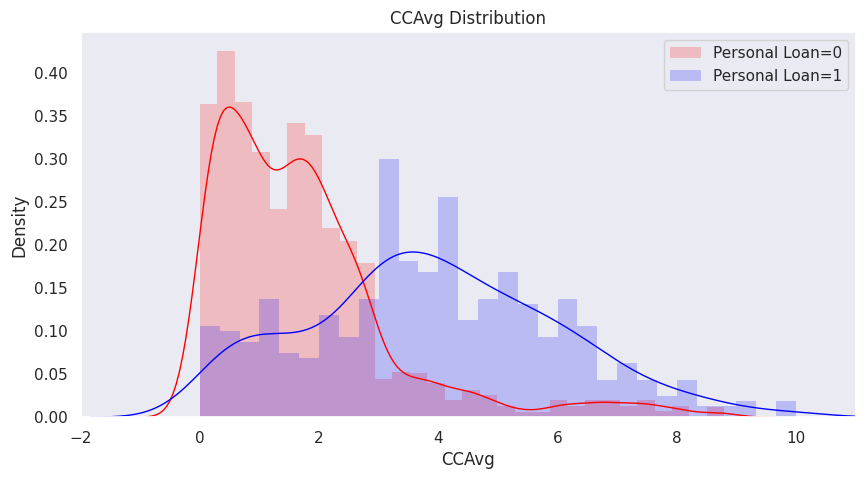

In [ ]:
plt.figure(figsize=(10, 5))

# Plot histograms (no KDE)
sns.histplot(data=loan[loan['Personal Loan'] == 0], x='CCAvg', stat='density', bins=30,
             color='red', label='Personal Loan=0', alpha=0.2, linewidth=0)

sns.histplot(data=loan[loan['Personal Loan'] == 1], x='CCAvg', stat='density', bins=30,
             color='blue', label='Personal Loan=1', alpha=0.2, linewidth=0)

# Add KDE lines separately with cut to extend into negative area
sns.kdeplot(data=loan[loan['Personal Loan'] == 0]['CCAvg'], color='red', linewidth=1, cut=3)
sns.kdeplot(data=loan[loan['Personal Loan'] == 1]['CCAvg'], color='blue', linewidth=1, cut=3)

# Expand x-axis
plt.xlim(-2, loan['CCAvg'].max() + 1)

# Labels and legend
plt.title('CCAvg Distribution')
plt.xlabel('CCAvg')
plt.ylabel('Density')
plt.legend()
plt.grid(False)
plt.show()

A person who has more average spending, most likely you will say yes to the personal loan. Most of the people who accept the personal loan have large spendings. You see the blue Large spendings, vs people who spend less (red). They spend less credit card they probably say no personal loan.

So if you are like, for example, 3,000 and above
most likely you will say yes

# Histogram Income probability density Distribution

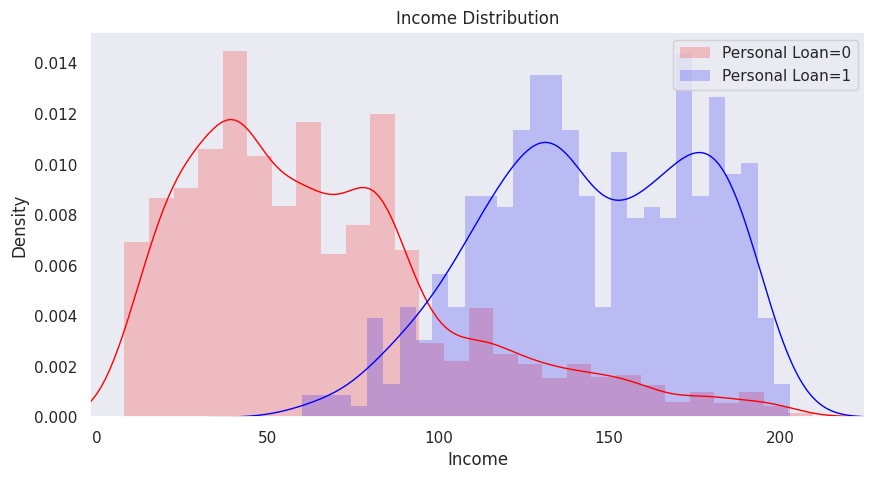

In [ ]:
plt.figure(figsize=(10, 5))

# Plot histograms (no KDE)
sns.histplot(data=loan[loan['Personal Loan'] == 0], x='Income', stat='density', bins=30,
             color='red', label='Personal Loan=0', alpha=0.2, linewidth=0)

sns.histplot(data=loan[loan['Personal Loan'] == 1], x='Income', stat='density', bins=30,
             color='blue', label='Personal Loan=1', alpha=0.2, linewidth=0)

# Add KDE lines separately with cut to extend into negative area
sns.kdeplot(data=loan[loan['Personal Loan'] == 0]['Income'], color='red', linewidth=1, cut=3)
sns.kdeplot(data=loan[loan['Personal Loan'] == 1]['Income'], color='blue', linewidth=1, cut=3)

# Expand x-axis
plt.xlim(-2, loan['Income'].max() + 1)

# Labels and legend
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Density')
plt.legend()
plt.grid(False)
plt.show()

If your income is above 100, and between 100 200, most likely you will say yes.

# Age Association with Experience

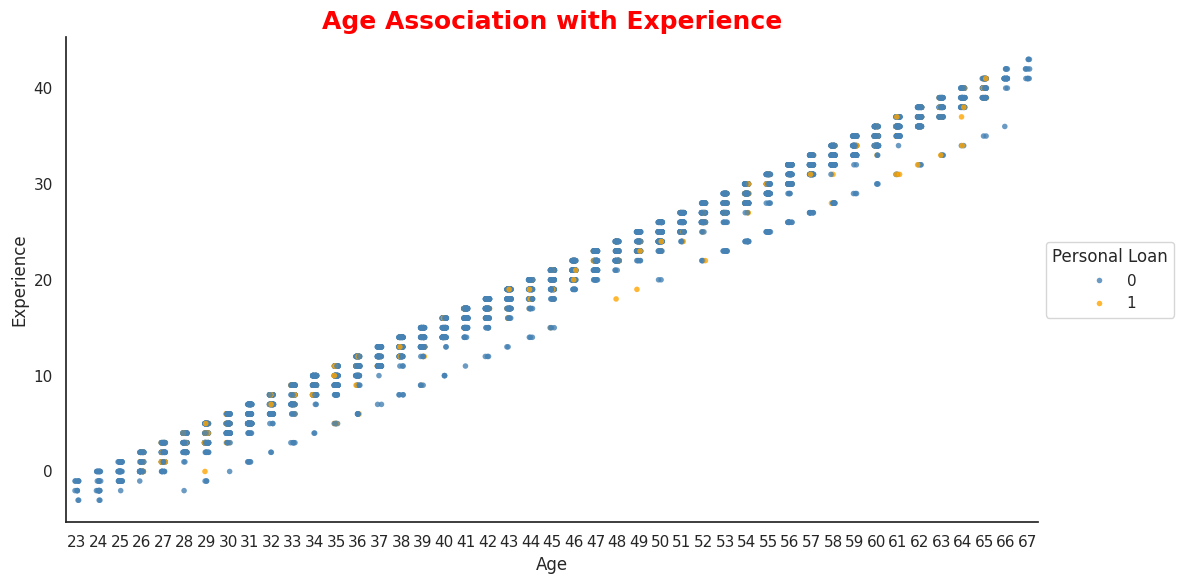

In [ ]:
# Set white clean background
sns.set_style("white")

plt.figure(figsize=(12, 6))
plt.title('Age Association with Experience', fontsize=18, color='red', weight='bold')

# Dot plot
sns.stripplot(
    data=loan,
    x='Age',
    y='Experience',
    hue='Personal Loan',
    palette={0: 'steelblue', 1: 'orange'},
    dodge=False,
    jitter=True,
    size=4,
    alpha=0.8
)

plt.xlabel('Age')
plt.ylabel('Experience')
plt.legend(title='Personal Loan', loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine()
plt.tight_layout()
plt.show()

You don't see any kind of pattern here, except that they are correlated with each others. They are correlated with each other.

# heatmap all Columns

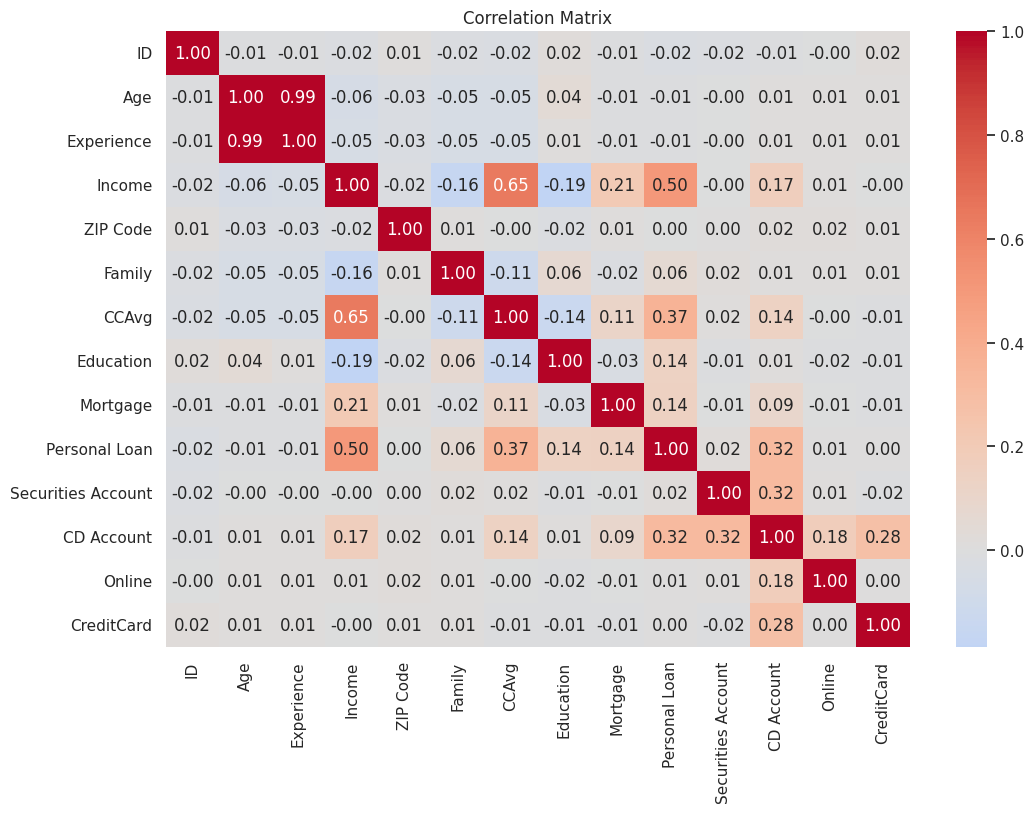

In [ ]:
# Compute correlation matrix
corr_matrix = loan.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

This is the correlation matrix. You can see now the correlation matrix also highlighted the age and experience. They are highly correlated with each other. So in this case it's it will be wise decisions that not to include both of them. So one of them will be enough.

Also the income and the credit card are somehow credit card spendings over here, credit card spendings and the income they are 0.65. They they have correlation between each. There's some kind of positive correlation here between that income and credit card spendings.

In term of target feature which is personal loan, it has the maximum correlation with the income, 0.5. It shows higher income more likely to accept a personal loan.

Zip code is is nothing.



# Modeling

# Dimensionality Reduction
### As we saw in the previous steps, ID and ZIP Code are irrelevant to our model building, so we will drop these features/attributes.

### Also, Age and Experience are highly correlated, so we will build our model with Experience and without Experience. We remove one of the age or experience. They are highly correlated. So one of them is enough. But I, in my case because we are learning here. I put with experience, without experience to show you that it's the only thing that if you include something that is highly correlated might create a bias in your system.

After that, we will compare the accuracy.

In [ ]:
loan.drop(['ID', 'ZIP Code'], axis=1, inplace=True)
loan.head(5)


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


# Split the Data into Training and Test Set

In [ ]:
# Create one dataset WITH Experience
loan_with_experience = loan.copy()

# Create one dataset WITHOUT Experience
loan_without_experience = loan.drop(['Experience'], axis=1)

# Modeling X and Y from Experience DataFrame:
X_Expr = loan_with_experience.drop('Personal Loan', axis=1)
Y_Expr = loan_with_experience[['Personal Loan']]

# Modeling X and Y from Non-Experience DataFrame:
X_Without_Expr = loan_without_experience.drop('Personal Loan', axis=1)
Y_Without_Expr = loan_without_experience[['Personal Loan']]


In [ ]:
"""
# Split Experience DataFrame
X_Expr_train, X_Expr_test, y_Expr_train, y_Expr_test = train_test_split(
    X_Expr, Y_Expr, test_size=0.30, random_state=1)

print('X train data {}'.format(X_Expr_train.shape))
print('y train data {}'.format(y_Expr_train.shape))
print('X test data {}'.format(X_Expr_test.shape))
print('y test data {}'.format(y_Expr_test.shape))
"""

"\n# Split Experience DataFrame\nX_Expr_train, X_Expr_test, y_Expr_train, y_Expr_test = train_test_split(\n    X_Expr, Y_Expr, test_size=0.30, random_state=1)\n\nprint('X train data {}'.format(X_Expr_train.shape))\nprint('y train data {}'.format(y_Expr_train.shape))\nprint('X test data {}'.format(X_Expr_test.shape))\nprint('y test data {}'.format(y_Expr_test.shape))\n"

In [ ]:
# Split No Experience DataFrame
X_NoExpr_train, X_NoExpr_test, y_NoExpr_train, y_NoExpr_test = train_test_split(
    X_Without_Expr, Y_Without_Expr, test_size=0.30, random_state=1)

print('X train data {}'.format(X_NoExpr_train.shape))
print('y train data {}'.format(y_NoExpr_train.shape))
print('X test data {}'.format(X_NoExpr_test.shape))
print('y test data {}'.format(y_NoExpr_test.shape))

X train data (3500, 10)
y train data (3500, 1)
X test data (1500, 10)
y test data (1500, 1)


#### we are going to predict personal loan = 1, means those people whom accept the personal loan.
#### we do a logistic regression model to see the difference between with experience and without experience results.
#### also keep in mind that experience had 52 rows minus values which were not make sense for experience and we havent handle those errors.

# What Happens When You Remove a Highly Correlated Feature (e.g., Experience)?
### In our case, Age and Experience are strongly positively correlated — meaning they provide redundant information. Including both does not necessarily help the model — in fact, it can hurt it.
### Removing `Experience` Reduces Variance:
- Highly correlated features can make model coefficients **unstable** (especially in linear models).
- This increases **model variance** — the model may overfit and perform poorly on new data.
- Removing one (like `Experience`) **simplifies** the model and **reduces variance**.
### But It May Slightly Increase Bias:
- The model loses some (redundant) information, leading to **slightly higher bias**.
- However, this tradeoff is often acceptable if it improves **generalization**.
### Bias-Variance Tradeoff Summary:

| Action                     | Bias                | Variance          | Overall Effect                |
|---------------------------|---------------------|--------------------|-------------------------------|
| **Keep both features**     | Lower bias          | Higher variance    | Model may overfit (unstable) |
| **Remove `Experience`**    | Slightly higher bias| Lower variance     | Model is simpler, more stable |


### Business Insight:
Removing `Experience` helps create a **more stable and generalizable model**, especially useful in real-world applications where interpretability and robustness matter more than squeezing out tiny performance gains.

# Modeling logisitic regression with Experience

"""Scaling the training and test data with preprocessing.scale"""

In [ ]:
"""
# Scale the training and test data
X_train_scaled = preprocessing.scale(X_Expr_train)
X_test_scaled = preprocessing.scale(X_Expr_test)
# Train logistic regression model
scaled_logreg_model = LogisticRegression(max_iter=5000)
scaled_logreg_model.fit(X_train_scaled, np.ravel(y_Expr_train))

# Predict on test set
scaled_logreg_y_predicted = scaled_logreg_model.predict(X_test_scaled)

# Model performance
scaled_logreg_model_score = scaled_logreg_model.score(X_test_scaled, y_Expr_test)
scaled_logreg_accuracy = accuracy_score(y_Expr_test, scaled_logreg_y_predicted)
scaled_logreg_confusion_matrix = confusion_matrix(y_Expr_test, scaled_logreg_y_predicted)
print("Logistic Regression Results")
print("-" * 35)
print(f"Model Score:       {scaled_logreg_model_score:.4f}")
print(f"Accuracy Score:    {scaled_logreg_accuracy:.4f}")
print("\nConfusion Matrix:")
print(scaled_logreg_confusion_matrix)


plt.figure(figsize=(6, 4))
sns.heatmap(scaled_logreg_confusion_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Loan', 'Loan'],
            yticklabels=['No Loan', 'Loan'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Logistic Regression')
plt.tight_layout()
plt.show()
"""

'\n# Scale the training and test data\nX_train_scaled = preprocessing.scale(X_Expr_train)\nX_test_scaled = preprocessing.scale(X_Expr_test)\n# Train logistic regression model\nscaled_logreg_model = LogisticRegression(max_iter=5000)\nscaled_logreg_model.fit(X_train_scaled, np.ravel(y_Expr_train))\n\n# Predict on test set\nscaled_logreg_y_predicted = scaled_logreg_model.predict(X_test_scaled)\n\n# Model performance\nscaled_logreg_model_score = scaled_logreg_model.score(X_test_scaled, y_Expr_test)\nscaled_logreg_accuracy = accuracy_score(y_Expr_test, scaled_logreg_y_predicted)\nscaled_logreg_confusion_matrix = confusion_matrix(y_Expr_test, scaled_logreg_y_predicted)\nprint("Logistic Regression Results")\nprint("-" * 35)\nprint(f"Model Score:       {scaled_logreg_model_score:.4f}")\nprint(f"Accuracy Score:    {scaled_logreg_accuracy:.4f}")\nprint("\nConfusion Matrix:")\nprint(scaled_logreg_confusion_matrix)\n\n\nplt.figure(figsize=(6, 4))\nsns.heatmap(scaled_logreg_confusion_matrix, annot=

"""Scaling the training and test data with StandardScaler()"""

In [ ]:
"""
# Initialize scaler
scaler = StandardScaler()

# Fit and transform on training set, transform test set
X_train_scaled = scaler.fit_transform(X_Expr_train)
X_test_scaled = scaler.transform(X_Expr_test)

# Train logistic regression
logreg_model = LogisticRegression(max_iter=5000)
logreg_model.fit(X_train_scaled, np.ravel(y_Expr_train))

# Predict and evaluate
y_pred = logreg_model.predict(X_test_scaled)

accuracy = accuracy_score(y_Expr_test, y_pred)
conf_matrix = confusion_matrix(y_Expr_test, y_pred)

print("=== Model WITH Experience ===")
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_Expr_test, y_pred, target_names=['No Loan', 'Loan']))

# Plot heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted: No Loan', 'Predicted: Loan'],
            yticklabels=['Actual: No Loan', 'Actual: Loan'])

plt.title('Confusion Matrix - Logistic Regression (WITH Experience)')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()
"""

'\n# Initialize scaler\nscaler = StandardScaler()\n\n# Fit and transform on training set, transform test set\nX_train_scaled = scaler.fit_transform(X_Expr_train)\nX_test_scaled = scaler.transform(X_Expr_test)\n\n# Train logistic regression\nlogreg_model = LogisticRegression(max_iter=5000)\nlogreg_model.fit(X_train_scaled, np.ravel(y_Expr_train))\n\n# Predict and evaluate\ny_pred = logreg_model.predict(X_test_scaled)\n\naccuracy = accuracy_score(y_Expr_test, y_pred)\nconf_matrix = confusion_matrix(y_Expr_test, y_pred)\n\nprint("=== Model WITH Experience ===")\nprint(f\'Accuracy: {accuracy:.4f}\')\nprint(\'Confusion Matrix:\')\nprint(conf_matrix)\nprint("\nClassification Report:")\nprint(classification_report(y_Expr_test, y_pred, target_names=[\'No Loan\', \'Loan\']))\n\n# Plot heatmap of the confusion matrix\nplt.figure(figsize=(6, 4))\nsns.heatmap(conf_matrix, annot=True, fmt=\'d\', cmap=\'Blues\',\n            xticklabels=[\'Predicted: No Loan\', \'Predicted: Loan\'],\n            yti

# Modeling logisitic regression without Experience

# Scaling the training and test data with StandardScaler()

=== Logistic Regression Model (No Experience) ===
Accuracy: 0.9487
Confusion Matrix:
[[1336   15]
 [  62   87]]

Classification Report:
              precision    recall  f1-score   support

     No Loan       0.96      0.99      0.97      1351
        Loan       0.85      0.58      0.69       149

    accuracy                           0.95      1500
   macro avg       0.90      0.79      0.83      1500
weighted avg       0.95      0.95      0.94      1500



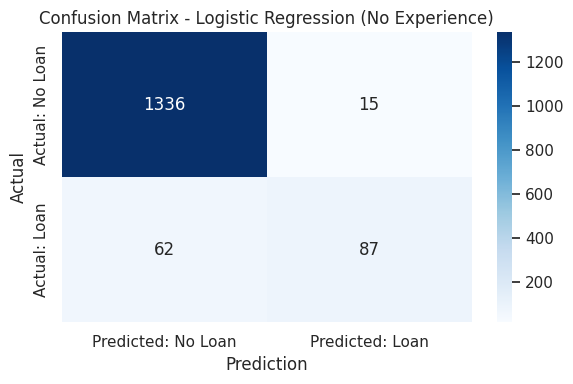

In [ ]:
# === Logistic Regression Model ===
scaler_logreg = StandardScaler()
X_train_scaled_logreg = scaler_logreg.fit_transform(X_NoExpr_train)
X_test_scaled_logreg = scaler_logreg.transform(X_NoExpr_test)

logreg_model = LogisticRegression(max_iter=5000)
logreg_model.fit(X_train_scaled_logreg, np.ravel(y_NoExpr_train))

y_pred_logreg = logreg_model.predict(X_test_scaled_logreg)
logreg_accuracy = accuracy_score(y_NoExpr_test, y_pred_logreg)
logreg_conf_matrix = confusion_matrix(y_NoExpr_test, y_pred_logreg)

print("=== Logistic Regression Model (No Experience) ===")
print(f'Accuracy: {logreg_accuracy:.4f}')
print('Confusion Matrix:')
print(logreg_conf_matrix)
print("\nClassification Report:")
print(classification_report(y_NoExpr_test, y_pred_logreg, target_names=['No Loan', 'Loan']))

plt.figure(figsize=(6, 4))
sns.heatmap(logreg_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted: No Loan', 'Predicted: Loan'],
            yticklabels=['Actual: No Loan', 'Actual: Loan'])
plt.title('Confusion Matrix - Logistic Regression (No Experience)')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

#### we saw that there is no difference between keeping the experience that was high correlated with age, and removing the experience, so we remove the experience.
#### also keep in mind that experience had 52 rows minus values which were not make sense for experience and we havent handle those errors.

# KNeighborsClassifier for model without expereince
# Determine best K

Optimal K: 3
Accuracy with Optimal K: 0.9580


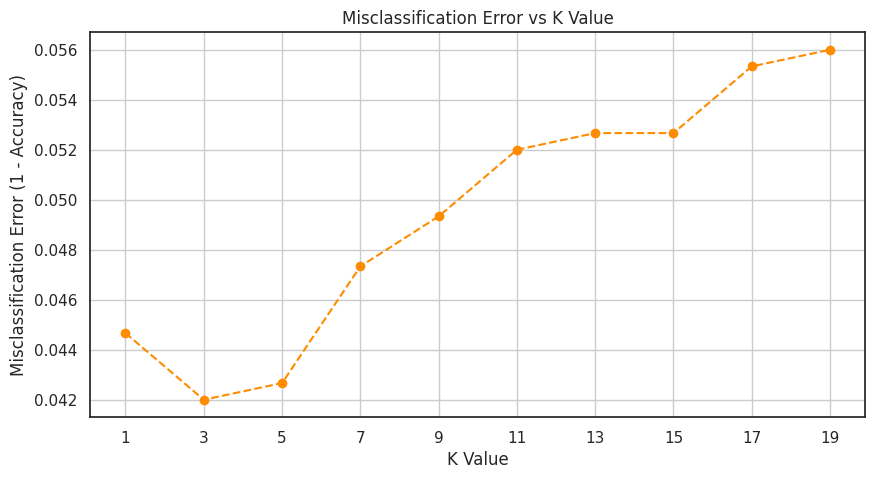

In [ ]:
# Step 1: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_NoExpr_train)
X_test_scaled = scaler.transform(X_NoExpr_test)

# Step 2: Determine best K
numberList = list(range(1, 20))
neighbors = list(filter(lambda x: x % 2 != 0, numberList))  # Only odd K values

ac_scores = []  # Store accuracy scores

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_NoExpr_train.values.ravel())
    y_pred = knn.predict(X_test_scaled)
    score = accuracy_score(y_NoExpr_test, y_pred)
    ac_scores.append(score)

# Step 3: Calculate misclassification error
MSE = [1 - score for score in ac_scores]
optimal_k = neighbors[MSE.index(min(MSE))]

print(f"Optimal K: {optimal_k}")
print(f"Accuracy with Optimal K: {ac_scores[MSE.index(min(MSE))]:.4f}")

# Step 4: Optional — Plot error vs K
plt.figure(figsize=(10, 5))
plt.plot(neighbors, MSE, marker='o', linestyle='--', color='darkorange')
plt.title('Misclassification Error vs K Value')
plt.xlabel('K Value')
plt.ylabel('Misclassification Error (1 - Accuracy)')
plt.xticks(neighbors)
plt.grid(True)
plt.show()

very low errors by just looking at the 3 names. So in this case, the key nearest neighbors, I can decide that I will not go further than 3 names.

"""Build KNN model with K=3"""

In [ ]:
"""
# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=optimal_k, weights='uniform', metric='euclidean')
knn_model.fit(X_train_scaled, np.ravel(y_NoExpr_train))

# Make predictions
y_knn_pred = knn_model.predict(X_test_scaled)

# Evaluate the model
knn_score = knn_model.score(X_test_scaled, y_NoExpr_test)
knn_accuracy = accuracy_score(y_NoExpr_test, y_knn_pred)
knn_conf_matrix = confusion_matrix(y_NoExpr_test, y_knn_pred)

# Print classification report
print("\nClassification Report:")
print(f"KNN Accuracy (k={optimal_k}): {knn_accuracy:.4f}")
print("Confusion Matrix:")
print(knn_conf_matrix)

print(classification_report(y_NoExpr_test, y_knn_pred, target_names=['No Loan', 'Loan']))

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted: No Loan', 'Predicted: Loan'],
            yticklabels=['Actual: No Loan', 'Actual: Loan'])

plt.title(f'Confusion Matrix (KNN, k={optimal_k})')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()
"""

'\n# Initialize and train the KNN model\nknn_model = KNeighborsClassifier(n_neighbors=optimal_k, weights=\'uniform\', metric=\'euclidean\')\nknn_model.fit(X_train_scaled, np.ravel(y_NoExpr_train))\n\n# Make predictions\ny_knn_pred = knn_model.predict(X_test_scaled)\n\n# Evaluate the model\nknn_score = knn_model.score(X_test_scaled, y_NoExpr_test)\nknn_accuracy = accuracy_score(y_NoExpr_test, y_knn_pred)\nknn_conf_matrix = confusion_matrix(y_NoExpr_test, y_knn_pred)\n\n# Print classification report\nprint("\nClassification Report:")\nprint(f"KNN Accuracy (k={optimal_k}): {knn_accuracy:.4f}")\nprint("Confusion Matrix:")\nprint(knn_conf_matrix)\n\nprint(classification_report(y_NoExpr_test, y_knn_pred, target_names=[\'No Loan\', \'Loan\']))\n\n# Plot heatmap\nplt.figure(figsize=(6, 4))\nsns.heatmap(knn_conf_matrix, annot=True, fmt=\'d\', cmap=\'Blues\',\n            xticklabels=[\'Predicted: No Loan\', \'Predicted: Loan\'],\n            yticklabels=[\'Actual: No Loan\', \'Actual: Loan\'])\

### Confusion Matrix Interpretation (KNN, k=3)

|                          | Predicted: No Loan | Predicted: Loan |
|--------------------------|--------------------|------------------|
| Actual: No Loan          | 1339 (True Negative) | 12 (False Positive)   |
| Actual: Loan             | 51 (False Negative)  | 98 (True Positive)    |


### What This Tells Us:

- **True Positives (TP = 98):** Model correctly predicted customers who took a loan.
- **True Negatives (TN = 1339):** Model correctly predicted customers who did not take a loan.
- **False Positives (FP = 12):** Model incorrectly predicted loan when there was none. *(Type I error)*
- **False Negatives (FN = 51):** Model missed customers who actually took a loan. *(Type II error)*


### Business Insight:

- The model is **very good at identifying non-loan customers**.
- It has **some difficulty identifying all loan customers** — 51 were missed.
- While the **overall accuracy may be high**, consider checking **precision, recall, and F1-score**, especially if the dataset is **imbalanced**.

### Classification Report

| Class      | Precision | Recall | F1-Score | Support |
|------------|-----------|--------|----------|---------|
| No Loan    | 0.96      | 0.99   | 0.98     | 1351    |
| Loan       | 0.89      | 0.66   | 0.76     | 149     |


### Metric Definitions

- **Precision**: Of all customers the model predicted as taking a loan, how many actually did?  
  High precision means fewer false positives.

- **Recall**: Of all customers who actually took a loan, how many did the model correctly identify?  
  High recall means fewer false negatives.

- **F1-Score**: Harmonic mean of precision and recall.  
  A balanced metric that works well when dealing with class imbalance.

- **Support**: Number of actual occurrences in the dataset for each class.


### Business Interpretation

- The model performs well for predicting non-loan customers with high precision (0.96) and recall (0.99).
- For customers who took a loan, recall drops to 0.66, meaning the model misses about 34% of actual loan takers.
- The F1-score for loan customers is 0.76, indicating room for improvement in identifying loan-positive clients.
- Imbalance in support (1351 vs. 149) may cause bias toward the majority class. Consider using resampling or class weighting techniques.

In real business scenarios, false negatives (missed loan customers) can be costly if potential clients are overlooked for marketing or credit services.


# Updated KNN Code with SMOTE to Handle Class Imbalance


=== KNN with SMOTE (k=3) ===
Accuracy: 0.9527
Confusion Matrix:
[[1305   46]
 [  25  124]]

Classification Report:
              precision    recall  f1-score   support

     No Loan       0.98      0.97      0.97      1351
        Loan       0.73      0.83      0.78       149

    accuracy                           0.95      1500
   macro avg       0.86      0.90      0.88      1500
weighted avg       0.96      0.95      0.95      1500



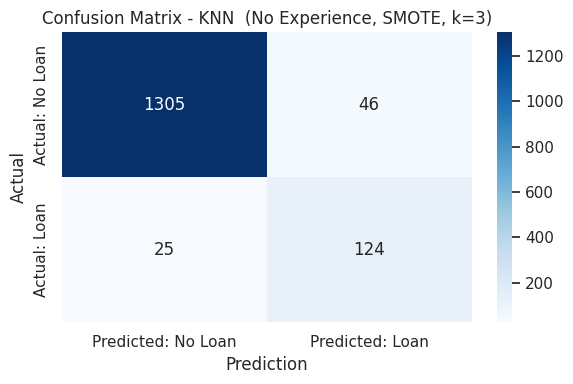

In [ ]:
# === KNN Model with SMOTE ===

# Apply SMOTE to the training data
smote_knn = SMOTE(random_state=1)
X_train_knn_smote, y_train_knn_smote = smote_knn.fit_resample(X_train_scaled, y_NoExpr_train)

# Initialize and train the KNN model on SMOTE-resampled data
knn_smote_model = KNeighborsClassifier(n_neighbors=optimal_k, weights='uniform', metric='euclidean')
knn_smote_model.fit(X_train_knn_smote, y_train_knn_smote)

# Predict on the original test set
y_pred_knn_smote = knn_smote_model.predict(X_test_scaled)

# Evaluate the model
knn_smote_accuracy = accuracy_score(y_NoExpr_test, y_pred_knn_smote)
knn_smote_conf_matrix = confusion_matrix(y_NoExpr_test, y_pred_knn_smote)

# Output metrics
print(f"\n=== KNN with SMOTE (k={optimal_k}) ===")
print(f"Accuracy: {knn_smote_accuracy:.4f}")
print("Confusion Matrix:")
print(knn_smote_conf_matrix)
print("\nClassification Report:")
print(classification_report(y_NoExpr_test, y_pred_knn_smote, target_names=['No Loan', 'Loan']))

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(knn_smote_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted: No Loan', 'Predicted: Loan'],
            yticklabels=['Actual: No Loan', 'Actual: Loan'])

plt.title(f'Confusion Matrix - KNN  (No Experience, SMOTE, k={optimal_k})')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


### Interpretation of KNN Results (with SMOTE, k=3)

- **Overall Accuracy**: **95.3%** — The model performs very well overall after applying SMOTE to balance the dataset.

#### **Class-wise Performance**

- **No Loan (Majority Class)**  
  - **Precision**: 0.98 — Most predicted "No Loan" labels are correct.  
  - **Recall**: 0.97 — The model successfully identified 97% of all actual "No Loan" customers.  
  - **F1-score**: 0.97  

- **Loan (Minority Class)**  
  - **Precision**: 0.73 — 73% of the predicted "Loan" cases were actually correct.  
  - **Recall**: 0.83 — The model was able to catch 83% of actual loan-accepting customers.  
  - **F1-score**: 0.78  

#### **Confusion Matrix Breakdown**

- **True Negatives (No Loan correctly predicted)**: 1305  
- **True Positives (Loan correctly predicted)**: 124  
- **False Positives (Predicted Loan but actually No Loan)**: 46  
- **False Negatives (Missed Loan cases)**: 25  

#### **Conclusion**

The application of **SMOTE** helped reduce bias toward the majority class. The model now detects more loan customers correctly, improving **recall** for the minority class, while maintaining high precision on the majority class. This results in a more balanced and effective classification model.


# GaussianNB


=== GaussianNB Model (No Experience) ===
Accuracy: 0.8747
Confusion Matrix:
[[1227  124]
 [  64   85]]

Classification Report:
              precision    recall  f1-score   support

     No Loan       0.95      0.91      0.93      1351
        Loan       0.41      0.57      0.47       149

    accuracy                           0.87      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.87      0.88      1500



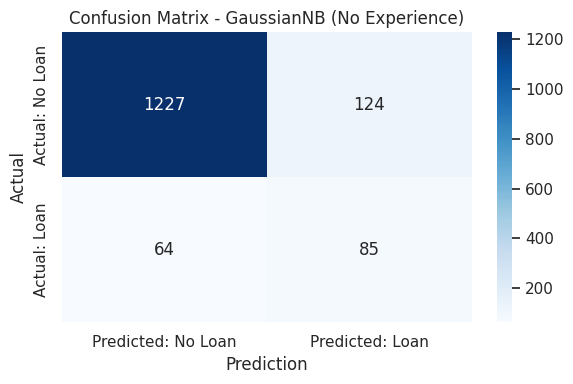

In [ ]:
# === Gaussian Naive Bayes Model ===
scaler_gnb = StandardScaler()
X_train_scaled_gnb = scaler_gnb.fit_transform(X_NoExpr_train)
X_test_scaled_gnb = scaler_gnb.transform(X_NoExpr_test)

gnb_model = GaussianNB()
gnb_model.fit(X_train_scaled_gnb, np.ravel(y_NoExpr_train))

y_pred_gnb = gnb_model.predict(X_test_scaled_gnb)
gnb_accuracy = accuracy_score(y_NoExpr_test, y_pred_gnb)
gnb_conf_matrix = confusion_matrix(y_NoExpr_test, y_pred_gnb)

print("\n=== GaussianNB Model (No Experience) ===")
print(f'Accuracy: {gnb_accuracy:.4f}')
print('Confusion Matrix:')
print(gnb_conf_matrix)
print("\nClassification Report:")
print(classification_report(y_NoExpr_test, y_pred_gnb, target_names=['No Loan', 'Loan']))

plt.figure(figsize=(6, 4))
sns.heatmap(gnb_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted: No Loan', 'Predicted: Loan'],
            yticklabels=['Actual: No Loan', 'Actual: Loan'])
plt.title('Confusion Matrix - GaussianNB (No Experience)')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

### Business Interpretation – GaussianNB

#### Focus: Customers Who Actually Took a Personal Loan

- **Total actual loan customers**: 149  
- **Correctly predicted (True Positives)**: 85  
- **Incorrectly predicted as No Loan (False Negatives)**: 64  

#### Key Metrics
- **Recall (Loan class)**: 0.57  
  → The model was able to identify only **57%** of actual loan customers.  
- **Precision (Loan class)**: 0.41  
  → Among those predicted as "Loan", only **41%** actually took the loan.  
- **F1-Score (Loan class)**: 0.47  
  → Indicates a weak balance between precision and recall for loan predictions.


### Business Analysis: Why Did the Model Fail?

- The model fails to **reliably identify customers who are likely to take a loan**.
- **Naive Bayes (GaussianNB)** assumes features are statistically independent and normally distributed — an assumption that likely **doesn't hold true** for financial behavior data.
- The low **precision (41%)** indicates many **false positives** — the bank may waste resources marketing to customers who will not convert.
- The low **recall (57%)** indicates many **missed opportunities** — the model fails to identify a large portion of actual loan customers.

---

### Business Implication
This model is **not reliable** for customer targeting or risk profiling.  
Relying on it could result in:
- **Ineffective marketing campaigns**
- **Lost revenue** due to missed cross-sell opportunities
- **Customer dissatisfaction** if irrelevant offers are sent

> **Recommendation**: Improve the model by:
- Using more suitable models like **Logistic Regression**, **KNN with SMOTE**, or ensemble techniques.
- Exploring feature interactions and removing GaussianNB’s independence assumption.



# Create the ROC Model Comparison Plot

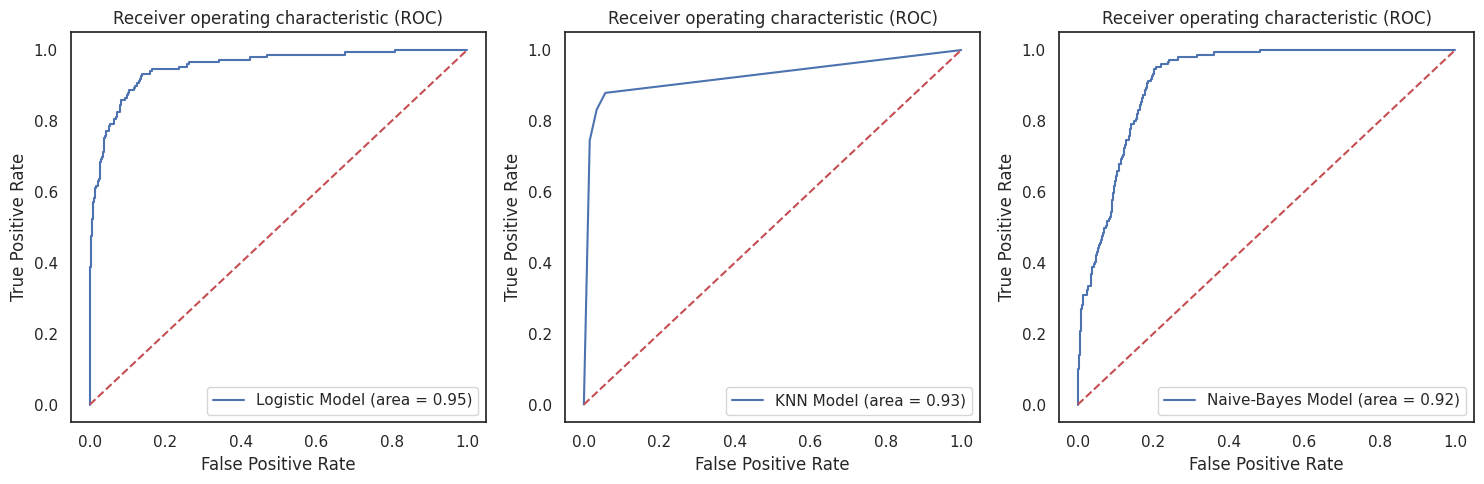

In [ ]:
# === ROC Curve Comparison ===

# Predicted probabilities
y_prob_logreg = logreg_model.predict_proba(X_test_scaled)[:, 1]
y_prob_knn_smote = knn_smote_model.predict_proba(X_test_scaled)[:, 1]
y_prob_gnb = gnb_model.predict_proba(X_test_scaled)[:, 1]

# ROC values
fpr_logreg, tpr_logreg, _ = roc_curve(y_NoExpr_test, y_prob_logreg)
fpr_knn, tpr_knn, _ = roc_curve(y_NoExpr_test, y_prob_knn_smote)
fpr_gnb, tpr_gnb, _ = roc_curve(y_NoExpr_test, y_prob_gnb)

# AUC scores
auc_logreg = roc_auc_score(y_NoExpr_test, y_prob_logreg)
auc_knn = roc_auc_score(y_NoExpr_test, y_prob_knn_smote)
auc_gnb = roc_auc_score(y_NoExpr_test, y_prob_gnb)

# Plotting ROC curves
plt.figure(figsize=(15, 5))

# Logistic Regression
plt.subplot(1, 3, 1)
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Model (area = {auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('Receiver operating characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# KNN with SMOTE
plt.subplot(1, 3, 2)
plt.plot(fpr_knn, tpr_knn, label=f'KNN Model (area = {auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('Receiver operating characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Naive Bayes
plt.subplot(1, 3, 3)
plt.plot(fpr_gnb, tpr_gnb, label=f'Naive-Bayes Model (area = {auc_gnb:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('Receiver operating characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()



# Plotting all ROC curves in one plot
plt.figure(figsize=(8, 6))

# Logistic Regression
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')

# KNN with SMOTE
plt.plot(fpr_knn, tpr_knn, label=f'KNN with SMOTE (AUC = {auc_knn:.2f})')

# Naive Bayes
plt.plot(fpr_gnb, tpr_gnb, label=f'Naive Bayes (AUC = {auc_gnb:.2f})')

# Reference line for random classifier
plt.plot([0, 1], [0, 1], 'r--', label='Random Classifier')

# Plot formatting
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Business Interpretation:

All three models perform significantly better than random guessing (diagonal red line).

Logistic Regression shows the highest AUC, meaning it best separates customers who accept vs. reject the personal loan offer.

KNN also performs well, particularly after applying SMOTE to address class imbalance.

Naive Bayes, while slightly lower in AUC, still shows strong predictive power.

Insight:

For decision-makers, the ROC curves suggest that:

Logistic Regression is the most reliable model for identifying potential personal loan customers.

The high true positive rate (upper left curve position) is especially important in marketing and finance, where identifying interested customers with high precision can significantly improve conversion rates and reduce outreach costs.

Models with higher AUCs provide better risk stratification, leading to smarter targeting and higher Return on Investment on loan campaigns.



# K-Fold Cross-Validation (with AUC for each model)

In [ ]:
# Prepare base data (already dropped Experience)
X = X_Without_Expr
y = Y_Without_Expr.values.ravel()

# Initialize Stratified K-Fold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store AUC scores
auc_logreg_scores = []
auc_knn_scores = []
auc_gnb_scores = []

for train_idx, test_idx in kfold.split(X, y):
    # Split data
    X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
    y_train_fold, y_test_fold = y[train_idx], y[test_idx]

    # Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_fold)
    X_test_scaled = scaler.transform(X_test_fold)

    # === Logistic Regression
    logreg = LogisticRegression(max_iter=5000)
    logreg.fit(X_train_scaled, y_train_fold)
    y_logreg_proba = logreg.predict_proba(X_test_scaled)[:, 1]
    auc_logreg_scores.append(roc_auc_score(y_test_fold, y_logreg_proba))

    # === KNN with SMOTE
    smote = SMOTE(random_state=1)
    X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train_fold)

    knn = KNeighborsClassifier(n_neighbors=optimal_k)
    knn.fit(X_train_smote, y_train_smote)
    y_knn_proba = knn.predict_proba(X_test_scaled)[:, 1]
    auc_knn_scores.append(roc_auc_score(y_test_fold, y_knn_proba))

    # === Gaussian Naive Bayes
    gnb = GaussianNB()
    gnb.fit(X_train_scaled, y_train_fold)
    y_gnb_proba = gnb.predict_proba(X_test_scaled)[:, 1]
    auc_gnb_scores.append(roc_auc_score(y_test_fold, y_gnb_proba))

# Print average AUC for each model
print("Average AUC Scores Across 5 Folds:")
print(f"Logistic Regression: {np.mean(auc_logreg_scores):.4f}")
print(f"KNN with SMOTE:     {np.mean(auc_knn_scores):.4f}")
print(f"Naive Bayes:        {np.mean(auc_gnb_scores):.4f}")


Average AUC Scores Across 5 Folds:
Logistic Regression: 0.9572
KNN with SMOTE:     0.9322
Naive Bayes:        0.9260


# ONLY logistic regression => K-Fold Cross-Validation

In [ ]:
# Use the dataset without the Experience column
X = X_Without_Expr
y = Y_Without_Expr.values.ravel()

# Set up stratified 5-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = []

for train_index, test_index in kfold.split(X, y):
    # Split into training and testing folds
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train logistic regression model
    logreg_model = LogisticRegression(max_iter=5000)
    logreg_model.fit(X_train_scaled, y_train)

    # Predict probabilities and compute AUC
    y_proba = logreg_model.predict_proba(X_test_scaled)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    auc_scores.append(auc)

# Output the average AUC
print("AUC Scores for each fold:", [f"{score:.4f}" for score in auc_scores])
print(f"\nAverage AUC (Logistic Regression): {np.mean(auc_scores):.4f}")


AUC Scores for each fold: ['0.9644', '0.9650', '0.9542', '0.9568', '0.9457']

Average AUC (Logistic Regression): 0.9572


#### The AUC scores across the five folds—0.9644, 0.9650, 0.9542, 0.9568, and 0.9457—indicate that the logistic regression model performs consistently well with minimal variation between folds. These values, all above 0.94, suggest strong discriminative ability, meaning the model is effective at distinguishing between customers who will and will not accept a personal loan. The average AUC of 0.9572 reflects the model’s high overall performance and reliability in generalizing to unseen data. This level of performance implies that logistic regression is a strong candidate for identifying potential loan customers and would likely support accurate and stable decision-making in a real-world business context.

* From the above analysis, we can conclude that the Logistic Regression model
* demonstrates the most balanced and consistent performance among all the models.
* It maintains strong accuracy while offering a favorable trade-off between Type I (False Positive) and Type II (False Negative) errors, making it a dependable choice for binary classification tasks like personal loan prediction.
* The area under the ROC curve for Logistic Regression is 0.95, which is close to 1 and higher than both the K-Nearest Neighbors and Naive Bayes models, indicating superior overall discriminative power.
* Therefore, among the evaluated models, Logistic Regression stands out as the best option for predicting which customers are likely to accept a personal loan, based on its high generalization performance and stable ROC characteristics.

# final business takeaway result: so wer need to relate this to a business case so with accuracy, 95% we can say that we can call the person with confidence of 95% that he will say, yes.

# **In the follow I done the modeling with my own created models.**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bank_Personal_Loan_Modelling.csv')

In [ ]:
df.shape

(5000, 14)

In [ ]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
df_transpose = df.describe().T.round(2)
df_transpose[['min', '25%', '50%', '75%', 'max']]

,min,25%,50%,75%,max
ID,1.0,1250.75,2500.5,3750.25,5000.0
Age,23.0,35.00,45.0,55.00,67.0
Experience,-3.0,10.00,20.0,30.00,43.0
Income,8.0,39.00,64.0,98.00,224.0
ZIP Code,9307.0,91911.00,93437.0,94608.00,96651.0
Family,1.0,1.00,2.0,3.00,4.0
CCAvg,0.0,0.70,1.5,2.50,10.0
Education,1.0,1.00,2.0,3.00,3.0
Mortgage,0.0,0.00,0.0,101.00,635.0
Personal Loan,0.0,0.00,0.0,0.00,1.0


<Axes: title={'center': 'Feature Importances'}>

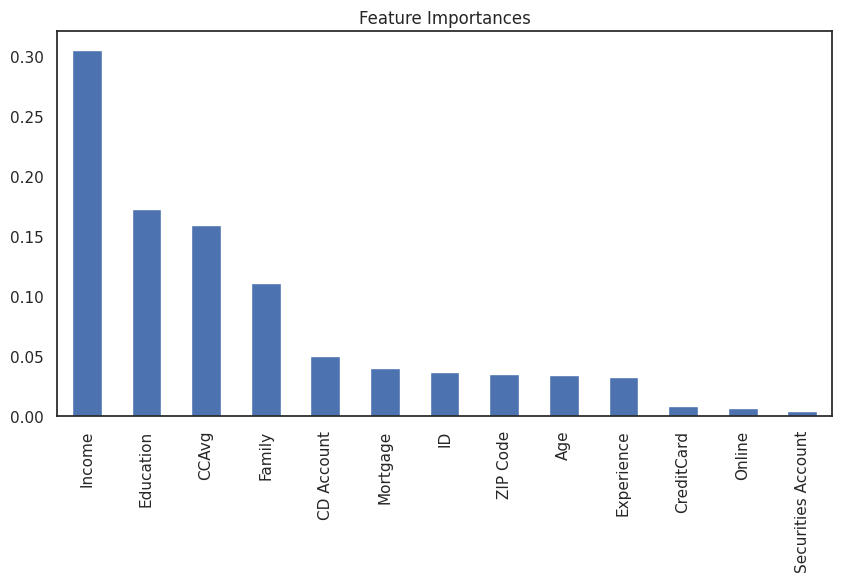

In [ ]:
features = df.columns.tolist()
features.remove("Personal Loan")
X = df[features]
y = df["Personal Loan"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title='Feature Importances')

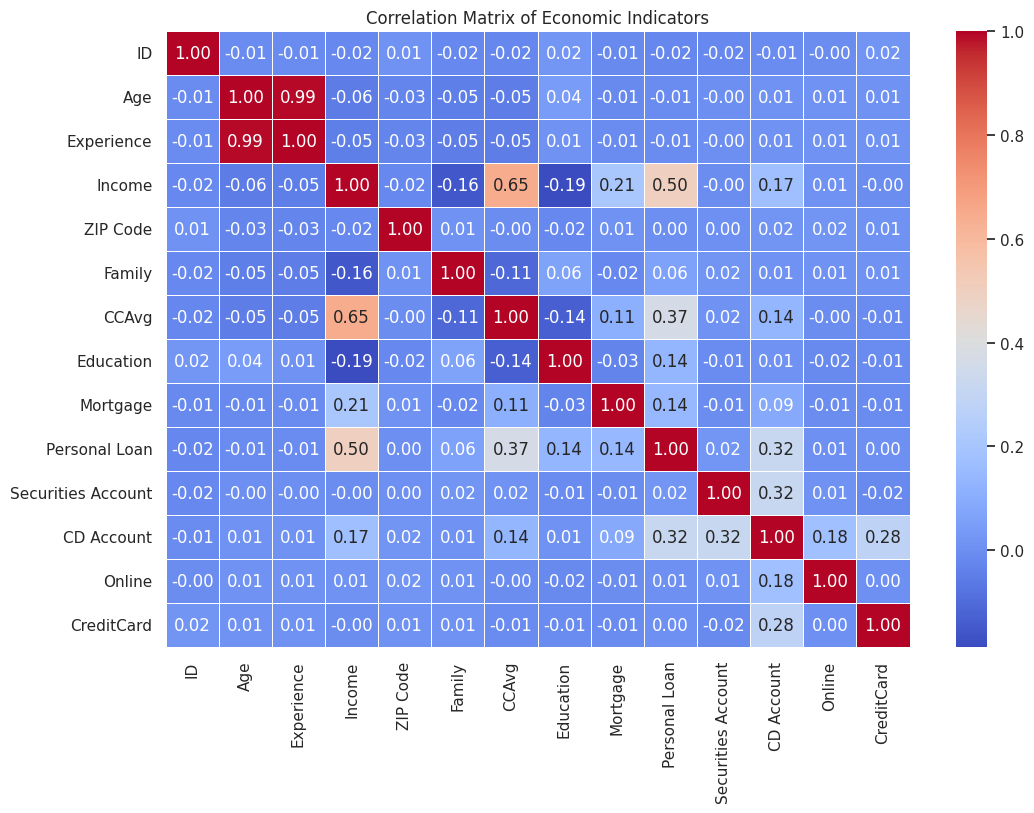

In [ ]:
# Check Correlations
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Economic Indicators")
plt.show()

In [ ]:
# Show pairs of features with high correlation
threshold = 0.8  # You can adjust this threshold (e.g., 0.9 for stricter filtering)
corr_matrix = df.corr().abs()

# Unstack and filter upper triangle
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_pairs = upper_triangle.stack().reset_index()
high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'] > threshold]

# Sort by correlation strength
high_corr_pairs = high_corr_pairs.sort_values(by='Correlation', ascending=False)

# Display results
print("\nHighly Correlated Feature Pairs (Correlation > {:.2f}):".format(threshold))
print(high_corr_pairs.to_markdown(index=False))


Highly Correlated Feature Pairs (Correlation > 0.80):
| Feature 1   | Feature 2   |   Correlation |
|:------------|:------------|--------------:|
| Age         | Experience  |      0.994215 |


In [ ]:
# Drop columns based on feature importance results
DROP_COLS = [
    "Experience", # because of high corelated with age
    "ID", # non informative not useful
    "ZIP Code", # not useful in our case
    "Securities Account", # because of having low feature imporance
]
df = df.drop(columns=DROP_COLS, errors="ignore")

In [ ]:
df.isnull().sum()

,0
Age,0
Income,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal Loan,0
CD Account,0
Online,0
CreditCard,0


In [ ]:
X = df.drop(columns=["Personal Loan"])
y = df["Personal Loan"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "| Test shape:", X_test.shape)

Train shape: (4000, 9) | Test shape: (1000, 9)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Define our models
base_models = {
    "Logistic Regression": LogisticRegression(max_iter=500, solver="liblinear"),
    "K Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(class_weight="balanced", random_state=42, oob_score=True),
    "Decision Tree": DecisionTreeClassifier(class_weight="balanced", random_state=42)
}

In [ ]:
# Define hyperparameter grids
param_grids = {
    "Logistic Regression": {
        "clf__C": [0.01, 0.1, 1],            # Regularization strength
        "clf__penalty": ["l2"]
    },
    "K Nearest Neighbors": {
        "clf__n_neighbors": [5, 7, 9],       # Avoid low values like 1 or 3
        "clf__weights": ["distance"]         # Distance weighting improves robustness
    },
    "Random Forest": {
        "clf__n_estimators": [50, 100],      # Number of trees
        "clf__max_depth": [5, 7],           # Control depth to reduce variance
        "clf__min_samples_split": [5, 10],   # Prevent overly deep trees
        "clf__min_samples_leaf": [2, 4]
    },
    "Decision Tree": {
        "clf__max_depth": [5, 10, None],     # Try limiting or fully growing the tree
        "clf__min_samples_split": [2, 5, 10],
        "clf__min_samples_leaf": [1, 2, 4]
    }
}

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_validate
# Cross-validation and scoring setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ["accuracy", "precision", "recall", "f1", "roc_auc"]

results = []
best_estimators = {}
grids = {}  # To store GridSearchCV objects for accessing best_params_ later

# Loop through and train each model
for name, model in base_models.items():
    print(f"\nRunning GridSearchCV for {name}...")

    # Create pipeline
    pipe = Pipeline([
        ("impute", SimpleImputer(strategy="mean")),
        ("scale", StandardScaler()),
        ("clf", model)
    ])

    # Run GridSearchCV
    grid = GridSearchCV(
        estimator=pipe,
        param_grid=param_grids[name],
        cv=cv,
        scoring="f1",
        n_jobs=-1
    )
    grid.fit(X_train, y_train)

    # Save the best model and GridSearchCV object
    best_estimators[name] = grid.best_estimator_
    grids[name] = grid

    # Evaluate best model using full cross-validation across multiple metrics
    best_model = grid.best_estimator_
    cv_scores = cross_validate(best_model, X_train, y_train, cv=cv, scoring=scoring)

    # Store results
    row = {
        metric.capitalize(): f"{cv_scores[f'test_{metric}'].mean():.3f} ± {cv_scores[f'test_{metric}'].std():.3f}"
        for metric in scoring
    }
    row["Model"] = name
    row["_F1_numeric"] = cv_scores["test_f1"].mean()
    results.append(row)

# Create and display sorted performance table
perf = (
    pd.DataFrame(results)
    .sort_values("_F1_numeric", ascending=False)
    .drop(columns="_F1_numeric")
    .reset_index(drop=True)
)

print("\n===== 5‑fold CV performance (sorted by F1) =====")
print(perf.to_markdown(index=False))

# Get best model name based on F1 (top row)
best_model_name = perf.iloc[0]["Model"]
best_params = grids[best_model_name].best_params_
print(f"\nBest hyperparameters for the best model: {best_model_name}:")
for param, value in best_params.items():
    print(f"  {param}: {value}")


Running GridSearchCV for Logistic Regression...

Running GridSearchCV for K Nearest Neighbors...

Running GridSearchCV for Random Forest...

Running GridSearchCV for Decision Tree...

===== 5‑fold CV performance (sorted by F1) =====
| Accuracy      | Precision     | Recall        | F1            | Roc_auc       | Model               |
|:--------------|:--------------|:--------------|:--------------|:--------------|:--------------------|
| 0.981 ± 0.005 | 0.878 ± 0.043 | 0.935 ± 0.026 | 0.905 ± 0.022 | 0.996 ± 0.001 | Random Forest       |
| 0.977 ± 0.005 | 0.870 ± 0.038 | 0.901 ± 0.037 | 0.884 ± 0.022 | 0.946 ± 0.018 | Decision Tree       |
| 0.962 ± 0.005 | 0.952 ± 0.029 | 0.633 ± 0.063 | 0.758 ± 0.042 | 0.932 ± 0.009 | K Nearest Neighbors |
| 0.951 ± 0.010 | 0.828 ± 0.078 | 0.620 ± 0.056 | 0.707 ± 0.056 | 0.955 ± 0.008 | Logistic Regression |

Best hyperparameters for the best model: Random Forest:
  clf__max_depth: 7
  clf__min_samples_leaf: 2
  clf__min_samples_split: 5
  clf__n_e

# Model Complexity (max_depth)

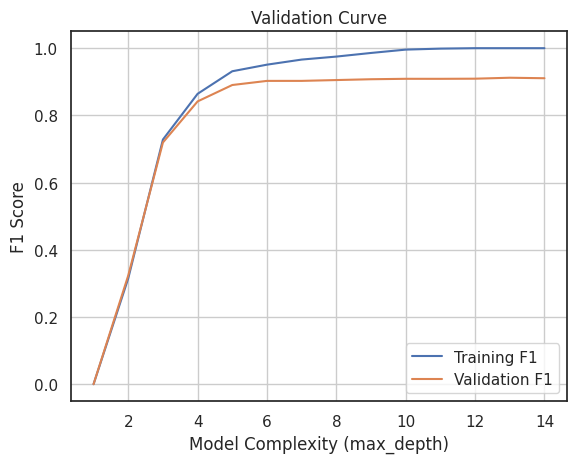

In [ ]:
from sklearn.model_selection import validation_curve

param_range = range(1, 15)  # e.g., max_depth values
train_scores, val_scores = validation_curve(
    estimator=RandomForestClassifier(),
    X=X_train,
    y=y_train,
    param_name="max_depth",
    param_range=param_range,
    scoring="f1",
    cv=5,
)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.plot(param_range, train_mean, label="Training F1")
plt.plot(param_range, val_mean, label="Validation F1")
plt.xlabel("Model Complexity (max_depth)")
plt.ylabel("F1 Score")
plt.title("Validation Curve")
plt.legend()
plt.grid(True)
plt.show()

# ROC Curve Comparison Across Models

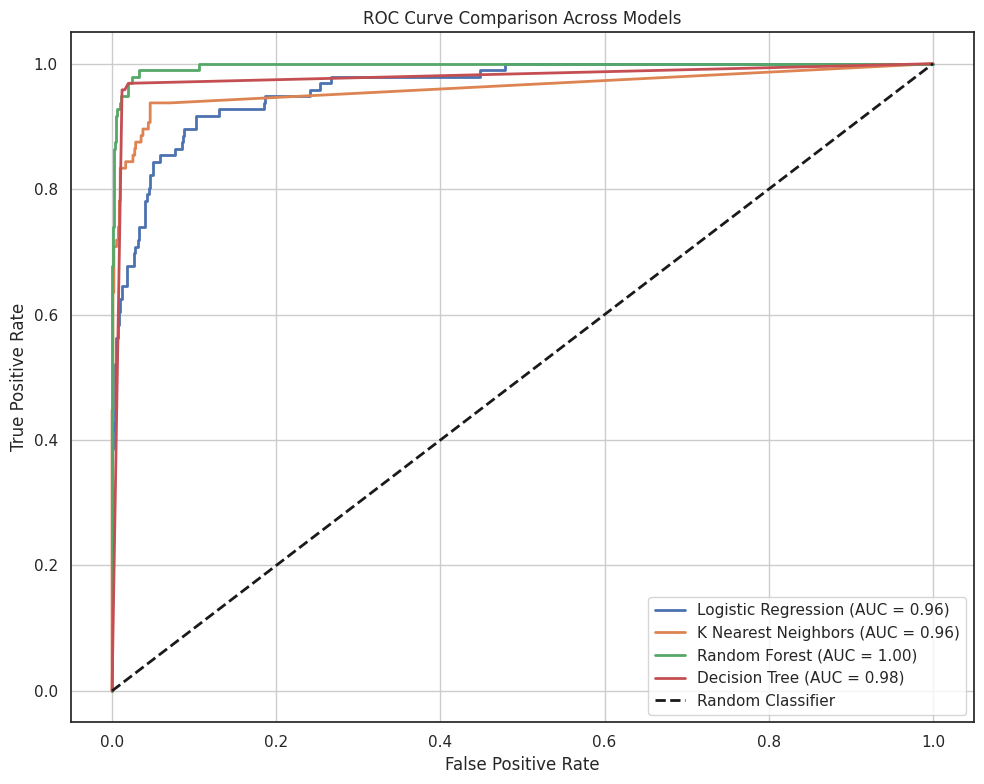

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

for name, model in best_estimators.items():
    if hasattr(model.named_steps["clf"], "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    elif hasattr(model.named_steps["clf"], "decision_function"):
        # For models like SVM or logistic regression without predict_proba
        y_prob = model.decision_function(X_test)
    else:
        continue  # Skip if no way to get probabilities

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot the diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', lw=2, label="Random Classifier")

# Add labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison Across Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

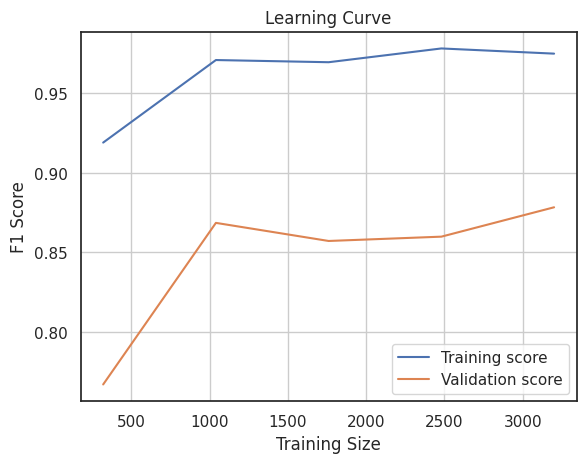

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train, y_train,
    cv=cv, scoring='f1', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
    shuffle=True, random_state=42
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, val_mean, label="Validation score")
plt.title("Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("F1 Score")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(f"\nPredict on test set (unseen dataset) with best model ({best_model_name})")

# Predict on test set
y_pred = best_model.predict(X_test)

# Evaluation
print("\n===== Classification report on the test set with best_pipe =====")
print(classification_report(y_test, y_pred))


Predict on test set (unseen dataset) with best model (Random Forest)

===== Classification report on the test set with best_pipe =====
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       904
           1       0.83      0.97      0.89        96

    accuracy                           0.98      1000
   macro avg       0.91      0.97      0.94      1000
weighted avg       0.98      0.98      0.98      1000

